# Activity 1: Classification

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv('TravelInfo.csv')

In [4]:
dataset.shape


(400, 3)

In [5]:
dataset.head()

,Age,Income,TravelAbroad
0,22,25000,0
1,38,26000,0
2,29,49000,0
3,30,63000,0
4,22,82000,0


Practice 1: If we use the whole dataset as the training data, how do we know how good our model is?

Not well, so maybe we should split it up into train and test.

In [7]:
X = dataset.iloc[:, [0, 1]].values # Input Data: Age and Income
y = dataset.iloc[:, 2].values # Labeled Data: Travelled or not

In [12]:
y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
 X, y, test_size = 0.25, random_state = 0)


## Feature Scaling or Normalization

In [15]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Train and Test using Decision Tree Algorithm

In [16]:
# Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(
 criterion = 'entropy', random_state = 0
)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [17]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [18]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[62,  6],
       [ 3, 29]])

Practise 2: From the confusion matrix output, discuss what are the values of True Negative,
True Positives, False Negative, and False Positive. Other than accuracy, would precision or
recall be a better measure for this particular case?

True Negative - 29
True Positives - 62
False Negative - 3
False Positive - 6

Maybe Precision because the value of False Positives are larger. 

False Negatives are more acceptable.



/var/folders/nl/dgjnfn8n3ll1d11n_ttjxz1c0000gn/T/ipykernel_15040/2075660123.py:27: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


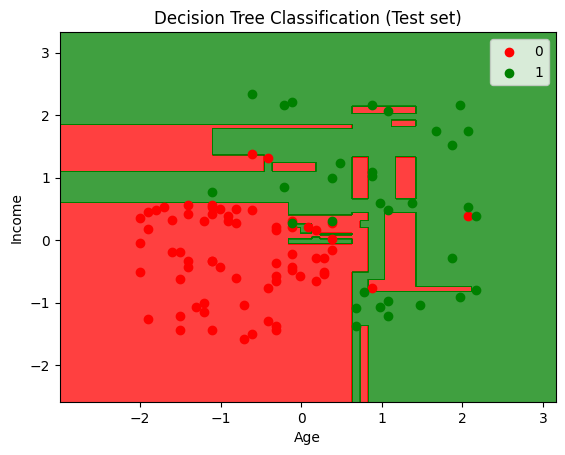

In [19]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(
 np.arange(
 start = X_set[:, 0].min() - 1,
 stop = X_set[:, 0].max() + 1,
 step = 0.01
 ),
 np.arange(
 start = X_set[:, 1].min() - 1,
 stop = X_set[:, 1].max() + 1,
 step = 0.01
 )
)
plt.contourf(
 X1,
 X2,
 classifier.predict(
 np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
 alpha = 0.75,
 cmap = ListedColormap(('red', 'green'))
)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
 plt.scatter(
 X_set[y_set == j, 0],
 X_set[y_set == j, 1],
 c = ListedColormap(('red', 'green'))(i),
 label = j
 )

plt.title('Decision Tree Classification (Test set)')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()
plt.show()

## Train and Test using Random Forest Algorithm

In [20]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(
 n_estimators = 20,
 criterion = 'entropy',
 random_state = 0
)
classifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred = classifier.predict(X_test)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[63,  5],
       [ 3, 29]])

Practice 3: Discuss the results of the above confusion matrix. What is the prediction
accuracy? Compare with the decision tree results.

Its basically the same.

In [22]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(
 n_estimators = 40,
 criterion = 'entropy',
 random_state = 0
)
classifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred = classifier.predict(X_test)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[64,  4],
       [ 2, 30]])

Slightly more accurate

# Activity 2: Clustering

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# Load the dataset from Moodle
df = pd.read_csv('Drivers.csv')
df.head()

,Driver_ID,Distance_Feature,Speeding_Feature
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25


In [24]:
# Check the dataset dimension
df.shape

(4000, 3)

Text(0, 0.5, 'Speeding_Feature')

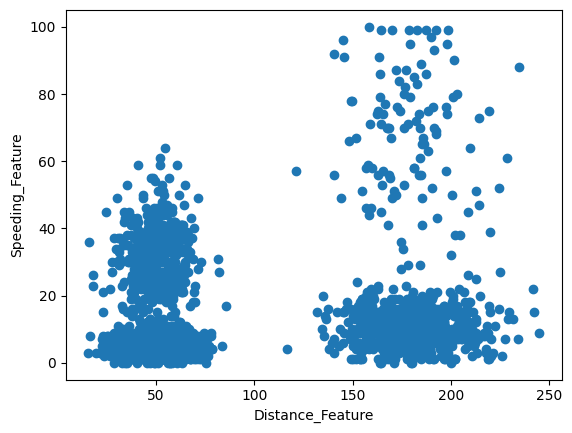

In [25]:
#Visualise the dataset (Distance vs Speeding)
plt.scatter(x=df['Distance_Feature'],y=df['Speeding_Feature'])
plt.xlabel('Distance_Feature')
plt.ylabel('Speeding_Feature')


In [27]:
from sklearn.cluster import KMeans
import numpy as np  # Example data generation
import matplotlib.pyplot as plt  # For visualization (optional)

In [28]:

# Run the K-means clustering over the dataset using only
# distance and speeding features. Set K=2: we only want
# to cluster the dataset into two subgroups
kmeans = KMeans(n_clusters=2).fit(
 df[['Distance_Feature','Speeding_Feature']]
)

/Users/rianb/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [29]:
# Look at the outputs: Two cluster centers
kmeans.cluster_centers_

array([[ 50.04763438,   8.82875   ],
       [180.017075  ,  18.29      ]])

In [30]:
# Look at the outputs: Cluster labels
kmeans.labels_

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

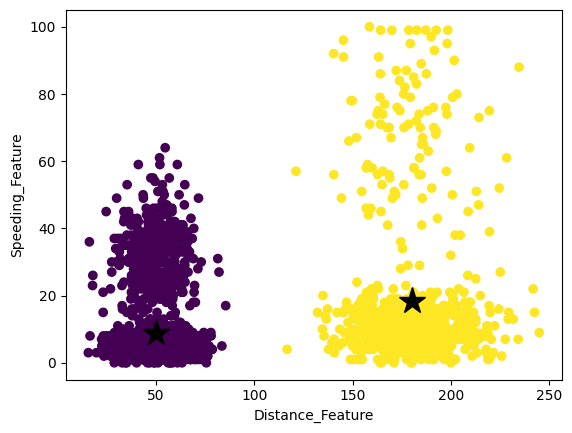

In [31]:
# Visualise the output labels
plt.scatter(
 x=df['Distance_Feature'],
 y=df['Speeding_Feature'],
 c=kmeans.labels_)
# Visualise the cluster centers (black stars)
plt.plot(
 kmeans.cluster_centers_[:,0],
 kmeans.cluster_centers_[:,1],
 'k*',
 markersize=20
)
plt.xlabel('Distance_Feature')
plt.ylabel('Speeding_Feature')
plt.show()

Practise 4: Discuss what type of drivers do each group present?

Maybe drivers that drive far and close. Maybe how much they speed.

/Users/rianb/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


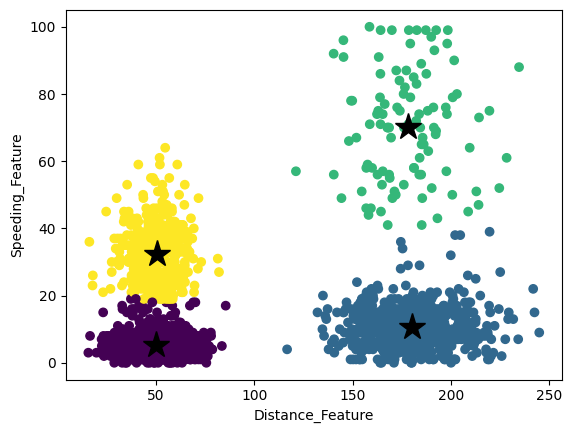

In [32]:
# Run K-means with another K value
# Set K=4: we want to cluster the dataset into four subgroups
kmeans2 = KMeans(n_clusters=4).fit(
 df[['Distance_Feature','Speeding_Feature']]
)
# Visualise the output labels
plt.scatter(
 x=df['Distance_Feature'],
 y=df['Speeding_Feature'],
 c=kmeans2.labels_
)
# Visualise the cluster centers (black stars)
plt.plot(
 kmeans2.cluster_centers_[:,0],
 kmeans2.cluster_centers_[:,1],
 'k*',
 markersize=20
)
plt.xlabel('Distance_Feature')
plt.ylabel('Speeding_Feature')
plt.show()

/Users/rianb/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


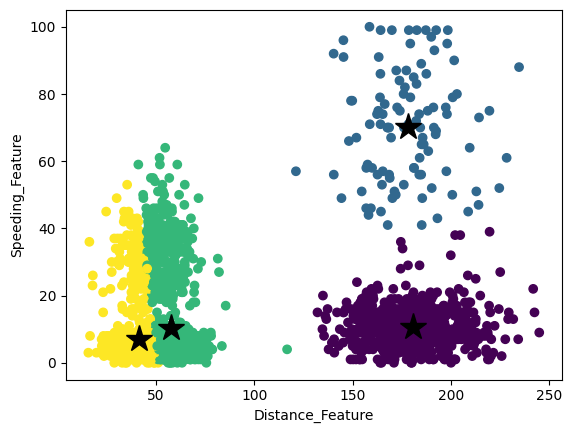

In [33]:
kmeans2 = KMeans(n_clusters=4, init='random').fit(
 df[['Distance_Feature','Speeding_Feature']]
)
plt.scatter(
 x=df['Distance_Feature'],
 y=df['Speeding_Feature'],
 c=kmeans2.labels_)
# Visualise the cluster centers (black stars)
plt.plot(
 kmeans2.cluster_centers_[:,0],
 kmeans2.cluster_centers_[:,1],
 'k*',
 markersize=20
)
plt.xlabel('Distance_Feature')
plt.ylabel('Speeding_Feature')
plt.show()

/Users/rianb/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


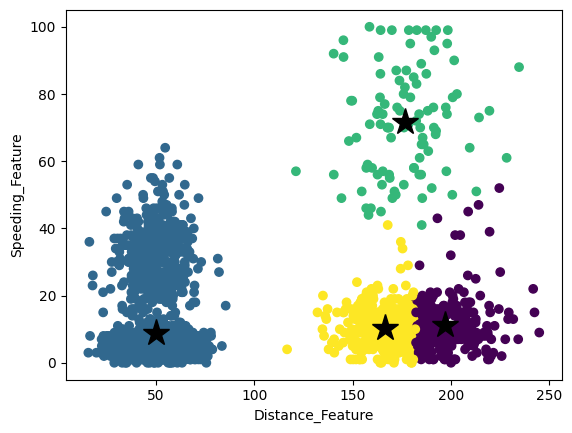

In [37]:
kmeans2 = KMeans(n_clusters=4, init='random').fit(
 df[['Distance_Feature','Speeding_Feature']]
)
plt.scatter(
 x=df['Distance_Feature'],
 y=df['Speeding_Feature'],
 c=kmeans2.labels_)
# Visualise the cluster centers (black stars)
plt.plot(
 kmeans2.cluster_centers_[:,0],
 kmeans2.cluster_centers_[:,1],
 'k*',
 markersize=20
)
plt.xlabel('Distance_Feature')
plt.ylabel('Speeding_Feature')
plt.show()

Practise 5: Does the clustering change? Why?

It randomly initalized the center of the clusters. I think?

# Activity 3: Exploring Cloud Machine Learning Tools